# 1. Import and Install Dependencies

In [13]:
!virtualenv env

created virtual environment CPython3.7.13.final.0-64 in 16364ms
  creator CPython3Windows(dest=C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage\env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\FreeComp\AppData\Local\pypa\virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.0.0, wheel==0.41.3
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [4]:
cd C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage\env\scripts


C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage\env\scripts


In [5]:
!activate

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe scikit-learn matplotlib

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached mediapipe-0.9.0-cp37-cp37m-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.8.11-cp37-cp37m-win_amd64.whl (49.0 MB)
  Using cached protobuf-3.19.6-cp37-cp37m-win_amd64.whl (896 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting unins

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\FreeComp\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install --user mediapipe


  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.42.0 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-gpu 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.42.0 which is incompatible.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow-gpu 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.1.1 which is incompatible.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


In [3]:
!pip3 install --user mediapipe 

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [18]:
results.face_landmarks

landmark {
  x: 0.52424616
  y: 0.7222199
  z: -0.039590847
}
landmark {
  x: 0.5248682
  y: 0.65346694
  z: -0.072117485
}
landmark {
  x: 0.52251935
  y: 0.674798
  z: -0.037760247
}
landmark {
  x: 0.50832695
  y: 0.58830154
  z: -0.055718083
}
landmark {
  x: 0.5244526
  y: 0.6326437
  z: -0.0768018
}
landmark {
  x: 0.52244294
  y: 0.6059536
  z: -0.07153546
}
landmark {
  x: 0.5161948
  y: 0.542781
  z: -0.034972485
}
landmark {
  x: 0.41117772
  y: 0.5453512
  z: 0.006542456
}
landmark {
  x: 0.5135594
  y: 0.49405128
  z: -0.026344562
}
landmark {
  x: 0.5130705
  y: 0.46609566
  z: -0.02939039
}
landmark {
  x: 0.50772476
  y: 0.36703584
  z: -0.015264141
}
landmark {
  x: 0.524426
  y: 0.7322016
  z: -0.037581775
}
landmark {
  x: 0.52409595
  y: 0.73947465
  z: -0.032811057
}
landmark {
  x: 0.5233867
  y: 0.74213207
  z: -0.026589703
}
landmark {
  x: 0.5240704
  y: 0.7465982
  z: -0.025980877
}
landmark {
  x: 0.5246743
  y: 0.7549056
  z: -0.02805567
}
landmark {
  x: 0.5

In [10]:
draw_landmarks(frame, results)

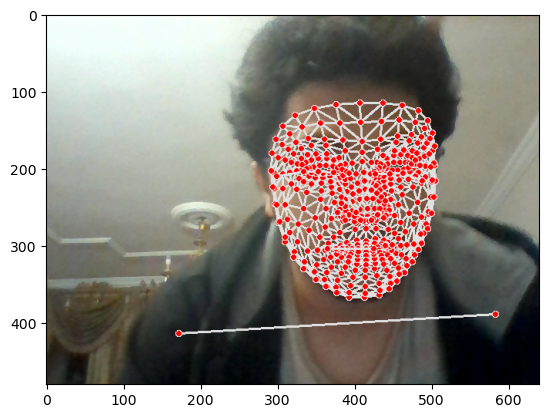

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [24]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

SyntaxError: invalid syntax (159585268.py, line 1)

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [42]:
result_test = extract_keypoints(results)[:10]

In [43]:
result_test

array([ 0.51471531,  0.63950074, -1.95023513,  0.99924916,  0.5542925 ,
        0.54314971, -1.89769268,  0.99823779,  0.57853788,  0.53792214])

In [115]:
468*3+33*4+21*3+21*3

1662

In [124]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [41]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:/Users/FreeComp/Desktop/stem_projects/autism_mariam/data') 


# Actions that we try to detect
actions = np.array(['fine', 'dangerous'])

# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 10

In [60]:
cd C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage

C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage


In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [51]:
cd ..

C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage


In [42]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [43]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions

    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [45]:
label_map = {label:num for num, label in enumerate(actions)}

In [46]:
label_map

{'fine': 0, 'dangerous': 1}

In [47]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [48]:
np.array(sequences).shape

(40, 1, 1662)

In [49]:
np.array(labels).shape

(40,)

In [50]:
X = np.array(sequences)

In [51]:
X.shape

(40, 1, 1662)

In [52]:
y = to_categorical(labels).astype(int)

In [53]:
y.shape

(40, 2)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [55]:
X_test.shape

(2, 1, 1662)

# 7. Build and Train LSTM Neural Network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(1,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
res = [.7, 0.8, 0.1]

In [28]:
actions[np.argmax(res)]

IndexError: index 95 is out of bounds for axis 0 with size 2

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
2/2 [==============================] - 4s 1s/step - loss: 0.6934 - categorical_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6929 - categorical_accuracy: 0.5208
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6921 - categorical_accuracy: 0.8810
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6912 - categorical_accuracy: 0.5104
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6893 - categorical_accuracy: 0.5208
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6865 - categorical_accuracy: 0.8147
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6827 - categorical_accuracy: 0.8810
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6773 - categorical_accuracy: 0.8810
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6693 - categorical_accuracy: 0.8706
Epoch 10/100
2/2 [==

2/2 [==============================] - 0s 6ms/step - loss: 0.2743 - categorical_accuracy: 0.8706
Epoch 76/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2916 - categorical_accuracy: 0.8706
Epoch 77/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2970 - categorical_accuracy: 0.8602
Epoch 78/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2873 - categorical_accuracy: 0.8706
Epoch 79/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2987 - categorical_accuracy: 0.8602
Epoch 80/100
2/2 [==============================] - 0s 0s/step - loss: 0.2906 - categorical_accuracy: 0.8602
Epoch 81/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2777 - categorical_accuracy: 0.8602
Epoch 82/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2678 - categorical_accuracy: 0.8810
Epoch 83/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2795 - categorical_accuracy: 0.8706
Epoch 84/100
2/2 [=====

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 128)            98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [37]:
res = model.predict(X_test)

In [38]:
actions[np.argmax(res[1])]

'thanks'

In [48]:
actions[np.argmax(y_test[1])]

'thanks'

# 9. Save Weights

In [61]:
model.save('C:/Users/FreeComp/Desktop/stem_projects/autism_mariam/data/poseW.h5')

In [52]:
cd C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage


C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage


In [217]:
del model

In [62]:
model.load_weights('C:/Users/FreeComp/Desktop/stem_projects/autism_mariam/data/poseW.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
yhat = model.predict(X_train)

In [44]:
ytrue = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [45]:
yhat

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[19,  0],
        [ 9,  0]],

       [[19,  0],
        [ 9,  0]],

       [[ 0, 18],
        [ 0, 10]]], dtype=int64)

In [47]:
accuracy_score(ytrue, yhat)

0.35714285714285715

# 11. Test in Real Time

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [53]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [37]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [38]:
len(sequence)

TypeError: object of type 'int' has no len()

In [57]:
sequence.append('def')

In [58]:
sequence.reverse()

In [59]:
sequence[-30:]

['def',
 array([ 0.56178635,  0.58574677, -1.49732101, ...,  0.        ,
         0.        ,  0.        ])]

In [64]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dangerous
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fine
<class 'mediapi

In [80]:
cd C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage

C:\Users\FreeComp\Desktop\sign_lang_detector\ActionDetectionforSignLanguage


In [62]:
#esp way
sequence = []
sentence = []
threshold = 0.8


# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while (1):

        # Read feed
        
        img = cv2.imread('C:/Users/FreeComp/Desktop/stem_projects/sign_lang_malak_khaled/ActionDetectionforSignLanguage/joo.jpg')
        # Make detections
        image, results = mediapipe_detection(img, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-1:]
        
        if len(sequence) == 1:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                break;

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
#         cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

KeyboardInterrupt: 

In [74]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)